# Numpy arrays
## Introduction

So far, to manipulate series of numbers (for example x, y for a plot) we used lists. In order to manipulate the numbers on these lists, we needed to use loops.

As an example, we have extracted data of the UV-vis spectrum of a water molecule to plot:

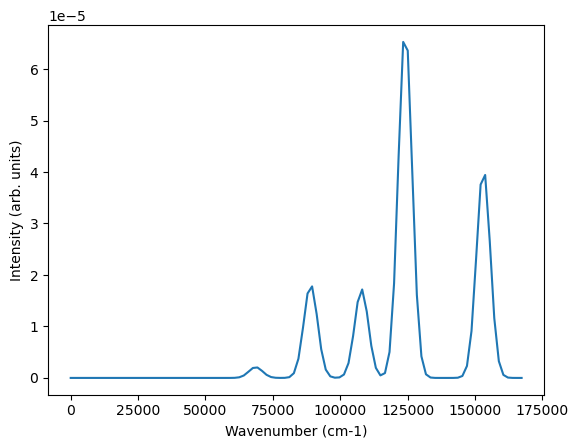

In [1]:
import matplotlib.pyplot as plt

# Read the data from a file
energies = []
intensities = []
with open('water_spectrum.txt') as f:
    lines = f.read().splitlines()
    for line in lines:
        x,y = line.split(",")
        energies.append(float(x))
        intensities.append(float(y))

plt.figure()
plt.plot(energies, intensities)
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Intensity (arb. units)")
plt.show()

**Exercise:** Now we want to change the units from cm$^{-1}$ to eV (1 cm$^{-1}$ = 0.00012398 eV). Write a code to do this and plot the result:

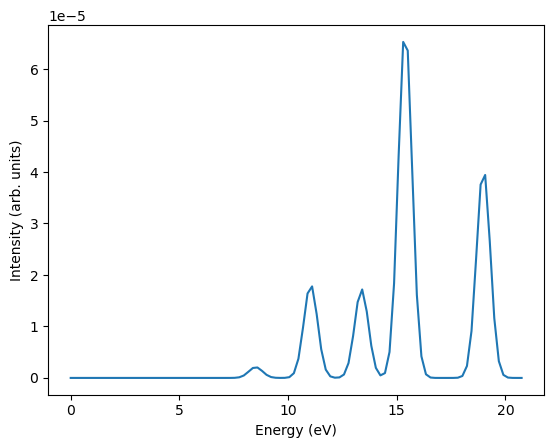

In [2]:
### BEGIN SOLUTION
energies_ev = []
for ene in energies:
    energies_ev.append(ene*0.00012398)

plt.figure()
plt.plot(energies_ev, intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

It would have been tempting to simply multiply the whole list by the conversion constant. However, lists are not restricted to numbers, and because of this, their built-in functions are not optimal for numbers. For example, check what happens when you multiply a list by 2.

In [3]:
mylist = [0, 1, 2, 3, 4, 5]
print(mylist*2)

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]


This is not at all what we wanted, but makes sense in the logic of lists as a collection of items. You have indeed duplicated that collection.

Fortunately, there is a library in python meant specifically to handle list of numbers: numpy. As for any library, it needs to be imported first. Because of how useful it is, it is often given a shorter name "np".

In [2]:
import numpy as np

Now, we can go back to our initial problem. We can create a numpy array from a python list:

In [5]:
myarray = np.array(mylist)
print(myarray)

[0 1 2 3 4 5]


Numpy arrays have several key differences to python list. They can only contain a single variable type (no mixed data) and have a fixed length. This means unlike python list, it is difficult to resize them. Internally, when resizing a numpy array, python had to instead create a copy.

On the other hand, they are easier to manipulate in numerical context, and often we can avoid loops altogether. In particular, the addition and multiplication behaves very differently:

In [6]:
print(myarray * 2)
print(myarray / 3)
print(myarray + 1)

[ 0  2  4  6  8 10]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[1 2 3 4 5 6]


**Exercise:** Now redo the conversion of the spectrum but using numpy array (note that matplotlib can read both numpy array and python lists)

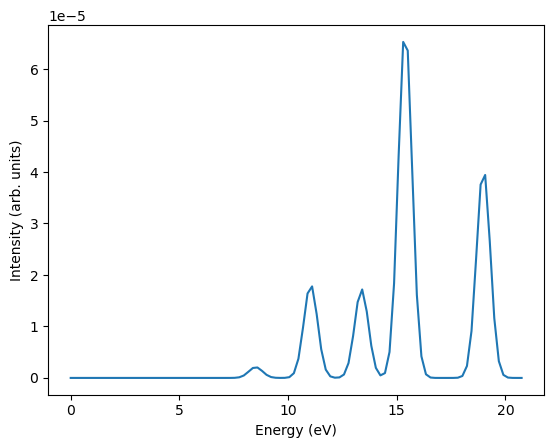

In [7]:
### BEGIN SOLUTION
np_energies_ev = np.array(energies) * 0.00012398
np_intensities = np.array(intensities)

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

## Creating numpy arrays

There are several ways to create numpy arrays. The first is to transform existing python objects as we already saw:

In [8]:
print(np.array([0,1,2,3,4,5]))
print(np.array((0,1,2,3,4,5)))
print(np.array(range(6)))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


But there are also built-in functions in numpy to create specific arrays:

In [9]:
print(np.zeros(10)) # a numpy array of zeros of length 10
print(np.ones(10)) # a numpy array of ones of length 10
print(np.arange(10)) # a numpy equivalent of range
print(np.arange(0, 10, 0.5)) # also works for non-integer steps
print(np.linspace(0,10,21)) # 21 equally-spaced numbers between 0 and 10
print(np.random.rand(10)) # 10 random numbers (by default between 0 and 1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 4 5 6 7 8 9]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[0.90904164 0.6667035  0.91721464 0.71787241 0.44794252 0.56423207
 0.82740861 0.93186651 0.47134421 0.87821645]


Unlike lists, numpy arrays can only contain elements of the same type. Thus when formed from a python list, it will choose the data type that fits everything. You can check the type of the array with the property "dtype".

In [35]:
# From integers -> integers
a = np.array([0, 1, 2])
print("from ints:", a.dtype)

# From floats -> floats
a = np.array([0.0, 1.0, 2.0])
print("from floats:", a.dtype)

# From mixed integers and floats -> floats (more general)
a = np.array([0, 1.0, 2])
print("from mixed ints-floats:", a.dtype)

# From booleans -> booleans
a = np.array([True, False, True])
print("from booleans:", a.dtype)

# From mixed ints and bools-> ints (it considers True = 1, False = 0)
a = np.array([True, False, 2])
print("from mixed:", a.dtype, "a = ",a)

# From strings and numbers -> strings
a = np.array(["Hello", "world", 1, 2])
print("from strings and numbers: a =", a)

from ints: int64
from floats: float64
from mixed ints-floats: float64
from booleans: bool
from mixed: int64 a =  [1 0 2]
from strings and numbers: a = ['Hello' 'world' '1' '2']


You can force the data type of the array by providing it or convert *a posteriori*.

In [44]:
array1 = np.array(range(10))
print(array1)

# Request a float array
array2 = np.array(range(10), dtype=float)
print(array2)

# Convert array1 to float
array3 = array1.astype(float)
print(array3)

# Doing math will also do the trick
array4 = array1 * 1.0
print(array4)

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


As explained before, it is not recommended to change the size of numpy arrays, since it is inefficient for the code. It is however possible if needed.

In [10]:
a = np.arange(10)
print(a)
print(np.append(a, 10))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10]


# Accessing numpy arrays

In many ways, numpy arrays behave like lists:

In [8]:
a = np.arange(0, 5, 0.5)
print(a)

# Measure length
print("number of elements in a: ",len(a))

# Accessed with []
print("element 2 is ",a[2])

# Can be looped over
print("The list of elements is")
for ax in a:
    print(ax)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
number of elements in a:  10
element 2 is  1.0
The list of elements is
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


# Operations

We have seen how numpy arrays behave with addition and multiplication, but many more operations can be done, similarly to regular numbers.

In [11]:
a = np.arange(0, 5, 0.5)
print("a       =", a)
print("a mod 2 =", a%2)
print("a^2     =", a**2)
print("sqrt(a) =", np.sqrt(a))
print("cos(a)  =", np.cos(a))

a       = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
a mod 2 = [0.  0.5 1.  1.5 0.  0.5 1.  1.5 0.  0.5]
a^2     = [ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25]
sqrt(a) = [0.         0.70710678 1.         1.22474487 1.41421356 1.58113883
 1.73205081 1.87082869 2.         2.12132034]
cos(a)  = [ 1.          0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362
 -0.9899925  -0.93645669 -0.65364362 -0.2107958 ]


Numpy also contains operations to find the min and the max as well as the mean of an array.

In [46]:
a = np.array([0,-2.0, 1.2, 3.5, 4.0, -0.5])
print("the min of a is",np.min(a), "and corresponds to element", np.argmin(a))
print("the max of a is",np.max(a), "and corresponds to element", np.argmax(a))
print("the min of a is",np.mean(a))

the min of a is -2.0 and corresponds to element 1
the max of a is 4.0 and corresponds to element 4
the min of a is 1.0333333333333334


**Exercise:** use the min/max functions to rescale the y axis so that the maximum of the spectrum is 1

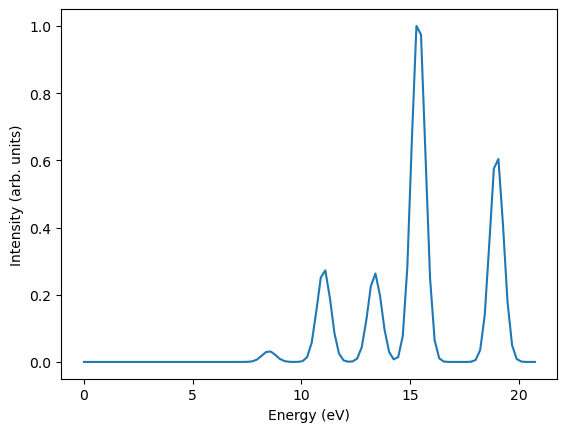

In [13]:
### BEGIN SOLUTION
int_max = np.max(np.array(intensities))
np_intensities = np.array(intensities)/int_max

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

# Higher dimensions (matrix)

While maybe not as useful for a regular chemist, it is also possible to use numpy arrays with more than 1 dimension, for example tables/matrices of numbers (2D). This can be very powerful for linear algebra for example.

In [14]:
print(np.array([[0, 1],[2,3]]))
print(np.zeros( (10,10) ))
print(np.identity(5))

[[0 1]
 [2 3]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Since numpy arrays can have very different shapes, there are also built-in functions to find the shape of the array.

In [15]:
A = np.array([[0, 1],[2,3], [4,5], [6,7]])
print(A)
print(len(A)) # this only gives you the length of the first dimension (number of rows)
print(A.shape) # this gives you both as a tuple 

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
4
(4, 2)


Using this, you can create arrays of the same shape as another one.

In [16]:
print(np.zeros(A.shape))
print(np.zeros_like(A)) # Alternative formulation but this time also checks what type of element is in A (here integers)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]]


# Slices

As is the case for list or strings, it is possible to slice numpy arrays:

In [17]:
a = np.arange(0, 10, 0.5)
print(a[:5])
print(a[15:])
print(a[10:15])
print(a[-6:-1]) # can also count from the end

[0.  0.5 1.  1.5 2. ]
[7.5 8.  8.5 9.  9.5]
[5.  5.5 6.  6.5 7. ]
[7.  7.5 8.  8.5 9. ]


It is also possible to take a list of elements:

In [18]:
indices = [0, 2, 5]
print(a[indices])

[0.  1.  2.5]


**Exercise:** Use this to remove the 0-5 eV part of the water spectrum (approximately the first 25 points).

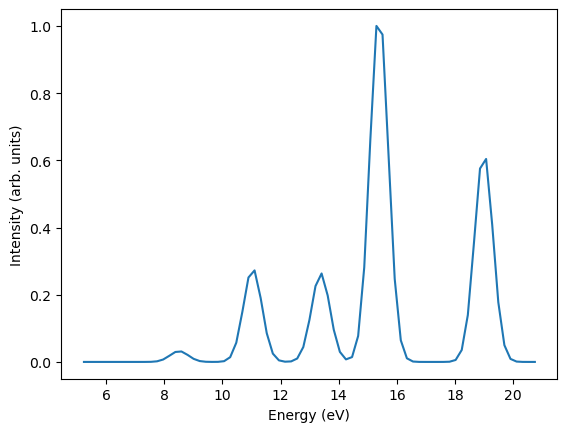

In [19]:
### BEGIN SOLUTION
plt.figure()
plt.plot(np_energies_ev[25:], np_intensities[25:])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

Numpy arrays can also be sliced using conditions:

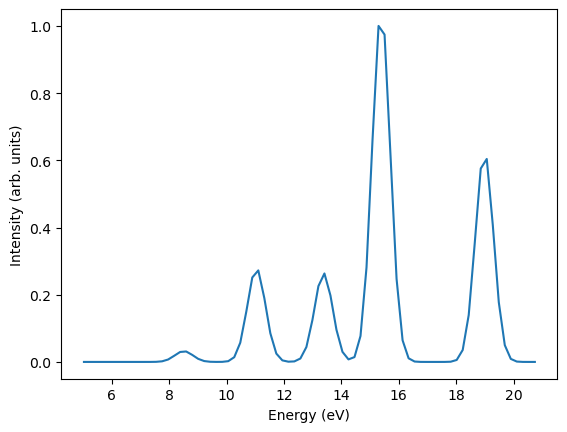

In [20]:
plt.figure()
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()

The condition itself becomes a boolean numpy array used as a "mask":

In [21]:
print(np_energies_ev>5)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Interpolation/Fitting

On top of providing a convenient format and set of functions to manipulate lists of numbers, numpy (as well as a related library scipy) offer many functions to accomplish data analysis, in particular interpolation and fitting.

Let's start with interpolation, which can be useful for example to create better looking curves from limited data.

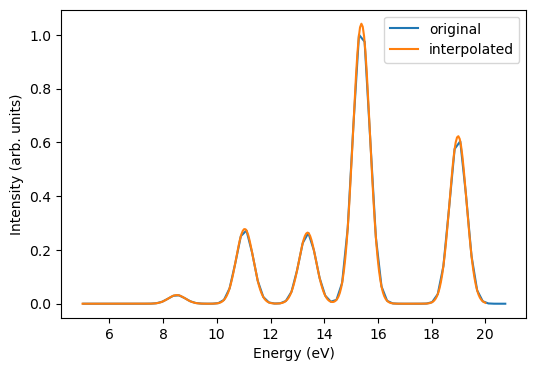

In [22]:
from scipy import interpolate

f = interpolate.interp1d(np_energies_ev, np_intensities, kind = "cubic") #cubic interpolation

new_energies = np.linspace(5,20,300) #300 points for increased resolution

plt.figure(figsize=(6, 4))
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5], label = "original")
plt.plot(new_energies, f(new_energies), label = "interpolated")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Interpolation in practice consists in fitting a curve locally to a polynomial. It can however be very sensitive to noise.

Often we want to fit our data to an analytical function not to make a figure nicer but to determine some free parameters in the theory. In these cases, we know the shape (formula) we expect the curves to have but are missing the physical parameters (reaction rate constant, excitation energy, NMR shift, etc...), and by doing the fit we can find the parameters and thus gain insight into the chemical problem.

Numpy and scipy have several functions to do this. One of the simpler and more flexible option is "curve_fit" of scipy. Here for example we have a distribution that we expect to be gaussian shape, but we want to know the mean and spread. We also provide the flexibility to have a vertical offset. We provide curve_fit with the gaussian function with free parameters and scipy try to find the parameters that give the best fit.

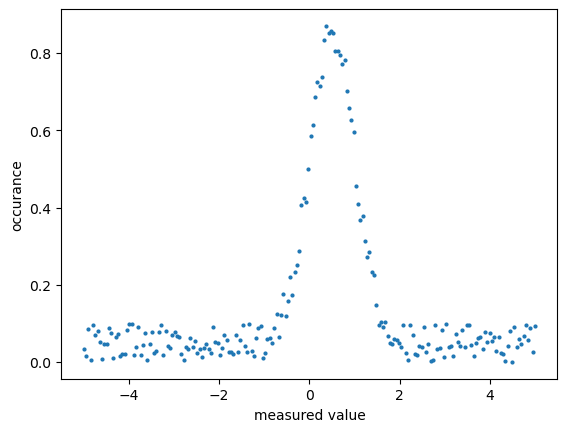

In [23]:
gauss = lambda x,mu=0,sigma=1,offset=0: 1/np.sqrt(2*np.pi*(sigma**2))*np.exp((-0.5/sigma**2)*((x-mu))**2)+offset
                                    
#create some data with some randomness and plot it
x=np.linspace(-5,5,200)
y=gauss(x,mu=0.5,sigma=0.5)+0.1*np.random.random(np.shape(x))

plt.figure()
plt.plot(x,y,'o',ms=2,label='data')
plt.xlabel('measured value')
plt.ylabel('occurance')
plt.show()

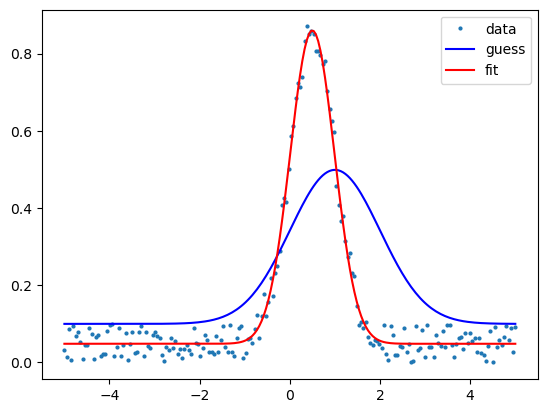

values: [0.49915534 0.49148571 0.04846645]
errors: [0.00582877 0.00475917 0.00200403]


In [24]:
from scipy.optimize import curve_fit

#make an initial guess
p0=[1,1,0.1]

#optimise
popt,pcov = curve_fit(gauss, xdata=x, ydata=y,p0=p0)

#plot both
plt.figure()
plt.plot(x,y,'o',ms=2,label='data')
plt.plot(x, gauss(x, mu=p0[0],sigma=p0[1],offset=p0[2]), 'b-', label='guess')
plt.plot(x, gauss(x, mu=popt[0],sigma=popt[1],offset=popt[2]), 'r-', label='fit')
plt.legend()
plt.show()

#get errors from the covariance matrix (works here, but careful)
perr = np.sqrt(np.diag(pcov))
print("values:", popt)
print("errors:", perr)

We see that we get approximately the (0.5 0.5 0) we started with, but with imprecision due to the noise. In particular, for the offset we get approximately 0.05 which is indeed half the amplitude of the noise we added. (if you want to fake data, a better noise should have 0 mean: `0.1*np.random.rand() - 0.05` )

**Exercise:** Plot the curve in file gaussian_fit.csv. Choose a fit function and use it to fit the curve.

In [25]:
### BEGIN SOLUTION
### END SOLUTION